# <p style="text-align:center;"><span style="font-size:48px;"><span style="color:#007BFF;"><span style="font-family:cursive;"> Corona Virus EDA</span> </span>  </span></p>

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #DC3545; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Table of Contents :</font></h3>

* [Phase 1 : Import & Install Libraries](#import)    
* [Phase 2 : About Dataset](#about)
    - [Phase 2.1 : Import Dataset](#importdata)
    - [Phase 2.2 : About Features](#features)
* [Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset](#eda)
    - [Phase 3.1 : Descriptive EDA](#des)
    - [Phase 3.2 : Visualization EDA](#vis)
    - [Phase 3.3 : Intelligently EDA](#ieda)
        - [Phase 3.3.1 : Pandas Profiling](#i1)
        - [Phase 3.3.2 : PandasAI](#i2)  
* [Phase 4 : Initial Data Preparation On Dataset](#idp)
    - [Phase 4.1 : Logical](#log)
        - [Phase 4.1.1 : Initial logic](#initlog)
        - [Phase 4.1.2 : Common logic](#comlog)
        - [Phase 4.1.3 : Scientific logic](#scilog)        
    - [Phase 4.2 : Type](#type)
        - [Phase 4.2.1 : Data Storage](#ds)
        - [Phase 4.2.2 : Data Type Management](#dtm)
        - [Phase 4.2.3 : Data Encoding(Optional)](#deo)    
    
    


<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 1 : Import & Install Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [30]:
!pip list > libraries.txt
!echo $(grep -r "pandasai" .)
!echo $(grep -r "pandas-profiling" .)

$(grep -r "pandasai" .)
$(grep -r "pandas-profiling" .)


In [31]:
# Descriptive EDA
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
import copy
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# IEDA
from ydata_profiling import ProfileReport
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 2 : About Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

- **Sno** - Serial number

- **ObservationDate** - Date of the observation in MM/DD/YYYY

- **Province/State** - Province or state of the observation (Could be empty when missing)

- **Country/Region** - Country of observation

- **Last Update** - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)

- **Confirmed** - Cumulative number of confirmed cases till that date

- **Deaths** - Cumulative number of of deaths till that date

- **Recovered** - Cumulative number of recovered cases till that date

<a id="eda"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="des"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.1 : Descriptive EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Weak)</p>

In [32]:
data = pd.read_csv('covid_19_data.csv')

In [33]:
data

SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0  

[306429 rows x 8 columns]

In [34]:
data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [35]:
data.tail()

SNo ObservationDate     Province/State  Country/Region  \
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0

In [36]:
data.head(10)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
5       26.0     0.0        0.0  
6        2.0     0.0        0.0  
7        1.0     0.0        0.0  
8        4.0     0.0        0.0  
9        1.0     0.0        0.0

In [37]:
data.tail(2)

SNo ObservationDate   Province/State Country/Region  \
306427  306428      05/29/2021  Zhytomyr Oblast        Ukraine   
306428  306429      05/29/2021     Zuid-Holland    Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0

<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Powerful)</p>

In [38]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

<p style="font-family:cursive; color:white; font-size:300%;">Data info (Weak)</p>

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [40]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 78.1 MB


In [41]:
data.memory_usage()

Index                  132
SNo                2451432
ObservationDate    2451432
Province/State     2451432
Country/Region     2451432
Last Update        2451432
Confirmed          2451432
Deaths             2451432
Recovered          2451432
dtype: int64

In [42]:
data.memory_usage(deep=True)

Index                   132
SNo                 2451432
ObservationDate    18079311
Province/State     16090369
Country/Region     17073176
Last Update        20816199
Confirmed           2451432
Deaths              2451432
Recovered           2451432
dtype: int64

In [43]:
data.memory_usage(deep=True).sum()

81864915

In [44]:
data.memory_usage(index=True, deep=True).sum()

81864915

**FM 1 : Search about memory_usage argument.**

<p style="font-family:cursive; color:white; font-size:300%;">Data info (Powerful)</p>

In [45]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [46]:
data.isnull()

SNo  ObservationDate  Province/State  Country/Region  Last Update  \
0       False            False           False           False        False   
1       False            False           False           False        False   
2       False            False           False           False        False   
3       False            False           False           False        False   
4       False            False           False           False        False   
...       ...              ...             ...             ...          ...   
306424  False            False           False           False        False   
306425  False            False           False           False        False   
306426  False            False           False           False        False   
306427  False            False           False           False        False   
306428  False            False           False           False        False   

        Confirmed  Deaths  Recovered  
0           False   False      False  
1           False   False      False  
2           False   False      False  
3           False   False      False  
4           False   False      False  
...           ...     ...        ...  
306424      False   False      False  
306425      False   False      False  
306426      False   False      False  
306427      False   False      False  
306428      False   False      False  

[306429 rows x 8 columns]

In [47]:
type(data.isnull().sum())

pandas.core.series.Series

In [48]:
type(len(data))

int

In [49]:
type(data.isnull().sum().values)

numpy.ndarray

In [50]:
data.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [51]:
info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "memory":data.memory_usage(index=False, deep=True)})

info.style.background_gradient(cmap=cm)

<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Waek)</p>

In [52]:
data.describe()

SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06

<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Midlevel)</p>

In [53]:
data.describe(include='all')

SNo ObservationDate Province/State Country/Region  \
count   306429.000000          306429         228326         306429   
unique            NaN             494            736            229   
top               NaN      05/29/2021        Unknown         Russia   
freq              NaN             765           4123          30251   
mean    153215.000000             NaN            NaN            NaN   
std      88458.577156             NaN            NaN            NaN   
min          1.000000             NaN            NaN            NaN   
25%      76608.000000             NaN            NaN            NaN   
50%     153215.000000             NaN            NaN            NaN   
75%     229822.000000             NaN            NaN            NaN   
max     306429.000000             NaN            NaN            NaN   

                Last Update     Confirmed         Deaths     Recovered  
count                306429  3.064290e+05  306429.000000  3.064290e+05  
unique                 1905           NaN            NaN           NaN  
top     2021-04-02 15:13:53           NaN            NaN           NaN  
freq                 239885           NaN            NaN           NaN  
mean                    NaN  8.567091e+04    2036.403268  5.042029e+04  
std                     NaN  2.775516e+05    6410.938048  2.015124e+05  
min                     NaN -3.028440e+05    -178.000000 -8.544050e+05  
25%                     NaN  1.042000e+03      13.000000  1.100000e+01  
50%                     NaN  1.037500e+04     192.000000  1.751000e+03  
75%                     NaN  5.075200e+04    1322.000000  2.027000e+04  
max                     NaN  5.863138e+06  112385.000000  6.399531e+06

In [54]:
data.describe(include='all').T

count unique                  top    freq          mean  \
SNo              306429.0    NaN                  NaN     NaN      153215.0   
ObservationDate    306429    494           05/29/2021     765           NaN   
Province/State     228326    736              Unknown    4123           NaN   
Country/Region     306429    229               Russia   30251           NaN   
Last Update        306429   1905  2021-04-02 15:13:53  239885           NaN   
Confirmed        306429.0    NaN                  NaN     NaN  85670.911559   
Deaths           306429.0    NaN                  NaN     NaN   2036.403268   
Recovered        306429.0    NaN                  NaN     NaN  50420.286304   

                           std       min      25%       50%       75%  \
SNo               88458.577156       1.0  76608.0  153215.0  229822.0   
ObservationDate            NaN       NaN      NaN       NaN       NaN   
Province/State             NaN       NaN      NaN       NaN       NaN   
Country/Region             NaN       NaN      NaN       NaN       NaN   
Last Update                NaN       NaN      NaN       NaN       NaN   
Confirmed        277551.604043 -302844.0   1042.0   10375.0   50752.0   
Deaths             6410.938048    -178.0     13.0     192.0    1322.0   
Recovered        201512.447838 -854405.0     11.0    1751.0   20270.0   

                       max  
SNo               306429.0  
ObservationDate        NaN  
Province/State         NaN  
Country/Region         NaN  
Last Update            NaN  
Confirmed        5863138.0  
Deaths            112385.0  
Recovered        6399531.0

<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Powerful)</p>

In [55]:
data_copy_1 = copy.copy(data)
data_copy_1.loc[:, data_copy_1.dtypes == object]

ObservationDate     Province/State  Country/Region          Last Update
0           01/22/2020              Anhui  Mainland China      1/22/2020 17:00
1           01/22/2020            Beijing  Mainland China      1/22/2020 17:00
2           01/22/2020          Chongqing  Mainland China      1/22/2020 17:00
3           01/22/2020             Fujian  Mainland China      1/22/2020 17:00
4           01/22/2020              Gansu  Mainland China      1/22/2020 17:00
...                ...                ...             ...                  ...
306424      05/29/2021  Zaporizhia Oblast         Ukraine  2021-05-30 04:20:55
306425      05/29/2021            Zeeland     Netherlands  2021-05-30 04:20:55
306426      05/29/2021           Zhejiang  Mainland China  2021-05-30 04:20:55
306427      05/29/2021    Zhytomyr Oblast         Ukraine  2021-05-30 04:20:55
306428      05/29/2021       Zuid-Holland     Netherlands  2021-05-30 04:20:55

[306429 rows x 4 columns]

In [56]:
data_copy = copy.copy(data)
le = LabelEncoder()
for column in data_copy.loc[:, data_copy.dtypes == object]:
    print(column)
    data_copy[column] = le.fit_transform(data_copy[column])


ObservationDate
Province/State
Country/Region
Last Update


In [57]:
data.nunique()

SNo                306429
ObservationDate       494
Province/State        736
Country/Region        229
Last Update          1905
Confirmed          107146
Deaths              20089
Recovered           74541
dtype: int64

In [58]:
''' cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "unique value of feature":data.nunique(),
                     "corr_target": data.corr()["Deaths"],
                     "memory":data.memory_usage(index=False, deep=True)
                    })

describe_stats = data.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None

sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm) '''

' cm = sns.light_palette("green", as_cmap=True)\n\ninfo = pd.DataFrame({"name": data.columns,\n                     "non-nulls": len(data) - data.isnull().sum().values,\n                     "nulls": data.isnull().sum().values,\n                     "type": data.dtypes.values,\n                     "unique value of feature":data.nunique(),\n                     "corr_target": data.corr()["Deaths"],\n                     "memory":data.memory_usage(index=False, deep=True)\n                    })\n\ndescribe_stats = data.describe(include=\'all\').T\n\ninfo["count"] = describe_stats["count"].values\ninfo["mean"] = describe_stats["mean"].values if \'mean\' in describe_stats else None\ninfo["std"] = describe_stats["std"].values if \'std\' in describe_stats else None\ninfo["min"] = describe_stats["min"].values if \'min\' in describe_stats else None\ninfo["25%"] = describe_stats["25%"].values if \'25%\' in describe_stats else None\ninfo["50%"] = describe_stats["50%"].values if \'50%\' in descr

In [59]:
cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data_copy.columns,
                     "non-nulls": len(data_copy) - data_copy.isnull().sum().values,
                     "nulls": data_copy.isnull().sum().values,
                     "type": data_copy.dtypes.values,
                     "unique value of feature":data_copy.nunique(),
                     "corr_target": data_copy.corr()["Deaths"],
                     "memory":data_copy.memory_usage(index=False, deep=True)
                    })

describe_stats = data_copy.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm)

<a id="vis"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.2 : Visualization EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

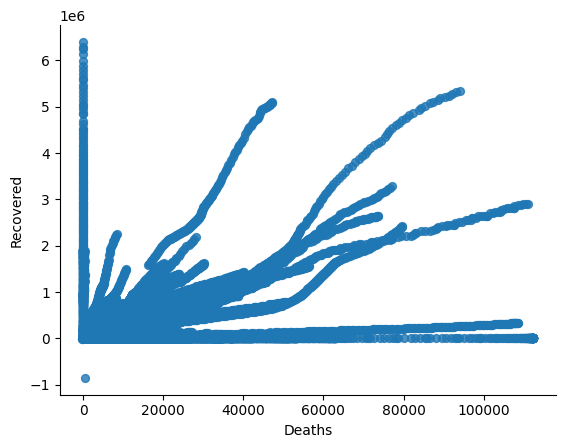

In [60]:
data.plot(kind='scatter', x='Deaths', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

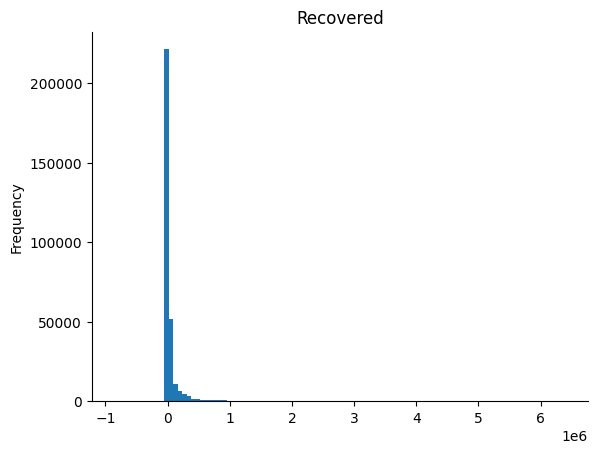

In [61]:
data['Recovered'].plot(kind='hist', bins=100, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

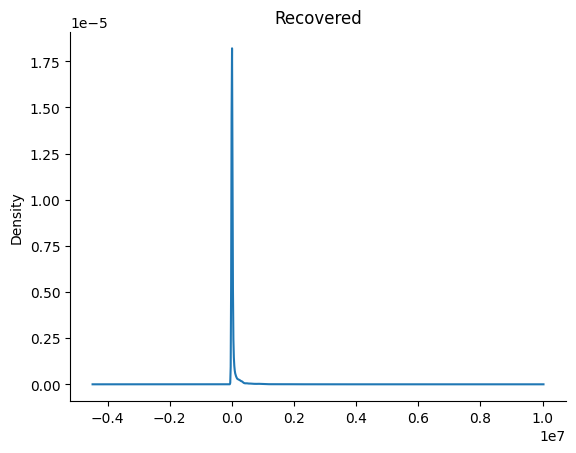

In [62]:
data['Recovered'].plot(kind='kde', title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

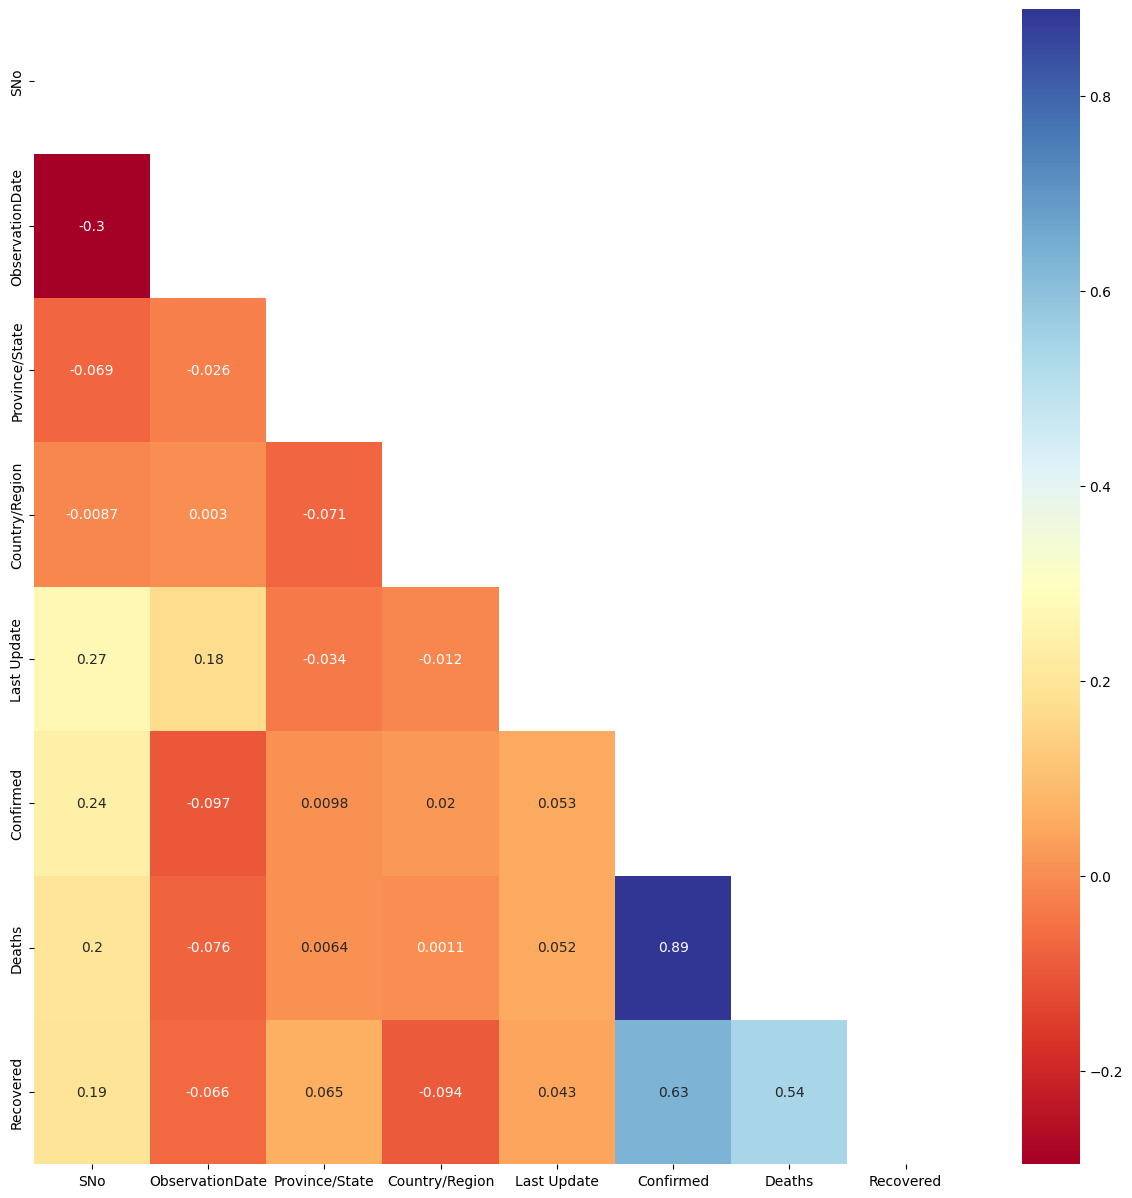

In [63]:
figure = plt.figure(figsize=(15, 15))
sns.heatmap(data_copy.corr(), cmap='RdYlBu', annot=True, mask=np.triu(data_copy.corr()))

In [64]:
def analyze_noise(df):
    """
    Analyzes the noise in each numeric column of the DataFrame and provides visualizations.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be analyzed.

    Returns:
    None
    """

    for column in df.select_dtypes(include=[np.number]).columns:
        print(f"Analyzing column: {column}")

        # Descriptive statistics
        mean_col = df[column].mean()
        median_col = df[column].median()
        std_col = df[column].std()
        skewness_col = df[column].skew()

        print(f"Mean: {mean_col}")
        print(f"Median: {median_col}")
        print(f"Standard Deviation: {std_col}")
        print(f"Skewness: {skewness_col}")

        # Histogram
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram of {column}")

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f"Box Plot of {column}")

        plt.show()

        # Time series plot if data has a time component
        if pd.api.types.is_datetime64_any_dtype(df.index):
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df[column])
            plt.title(f"Time Series Plot of {column}")
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.show()

        # Signal-to-Noise Ratio (SNR)
        signal_power = np.mean(df[column] ** 2)
        noise_power = np.var(df[column])
        snr = signal_power / noise_power if noise_power != 0 else np.inf
        print(f"Signal-to-Noise Ratio (SNR): {snr}")

        print("\n" + "-"*40 + "\n")

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


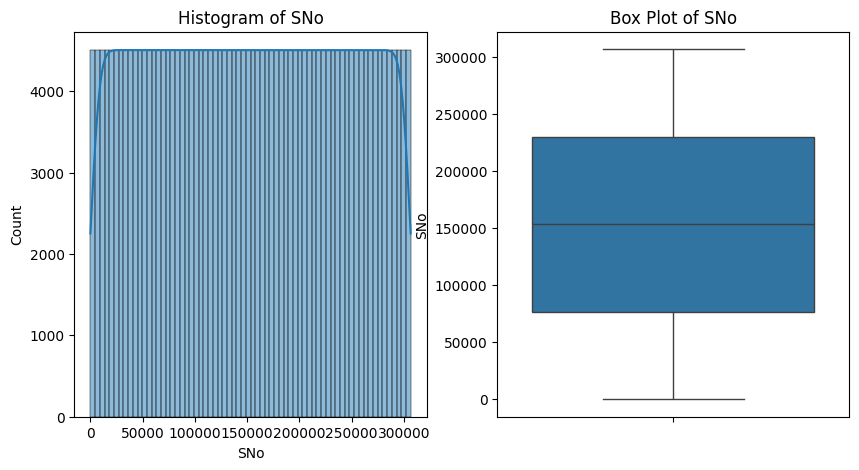

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


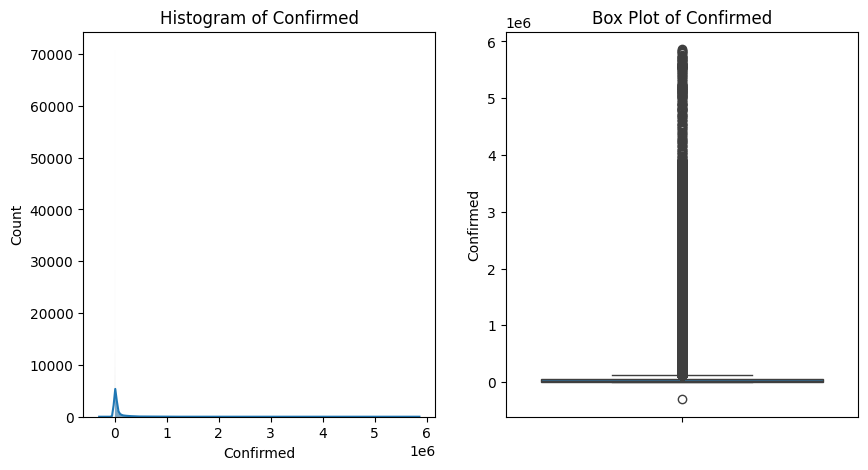

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


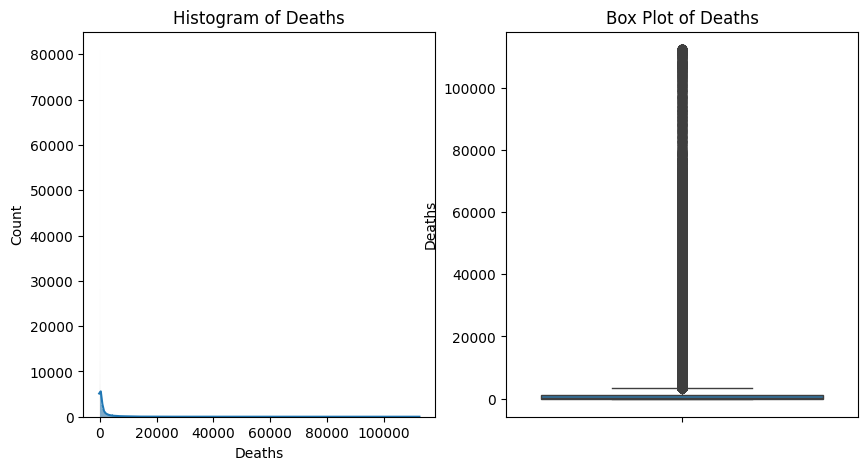

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


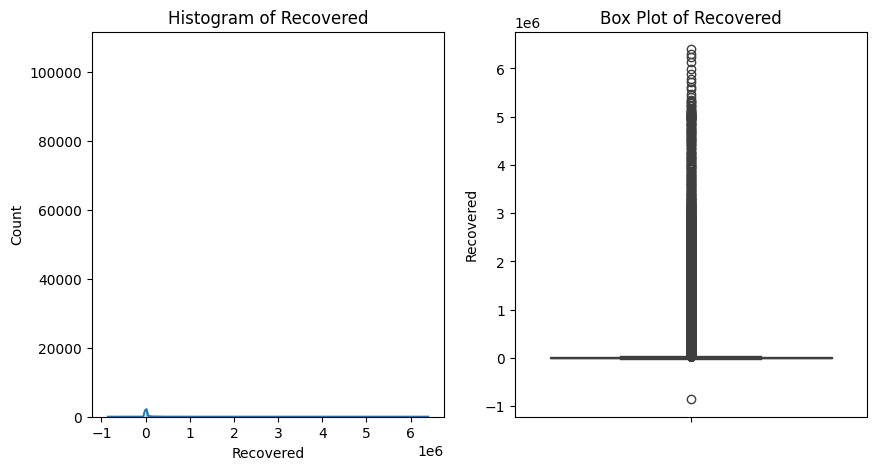

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [65]:
analyze_noise(data)

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


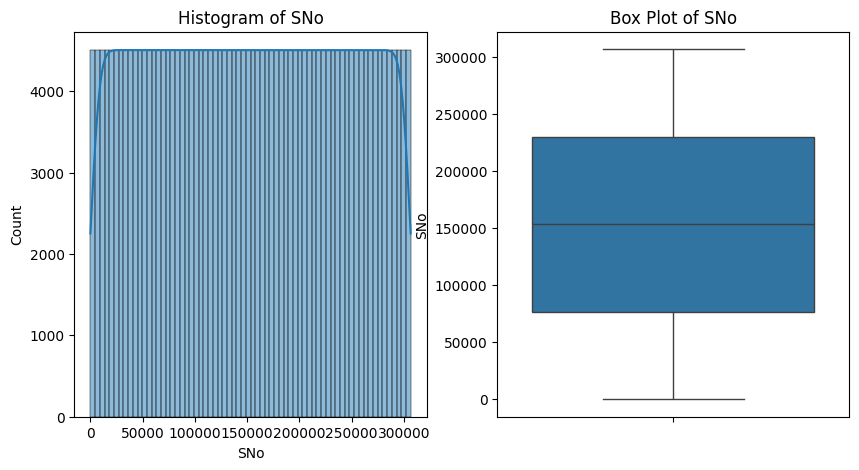

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: ObservationDate
Mean: 270.3815141517285
Median: 289.0
Standard Deviation: 142.3028201402964
Skewness: -0.2683786522022269


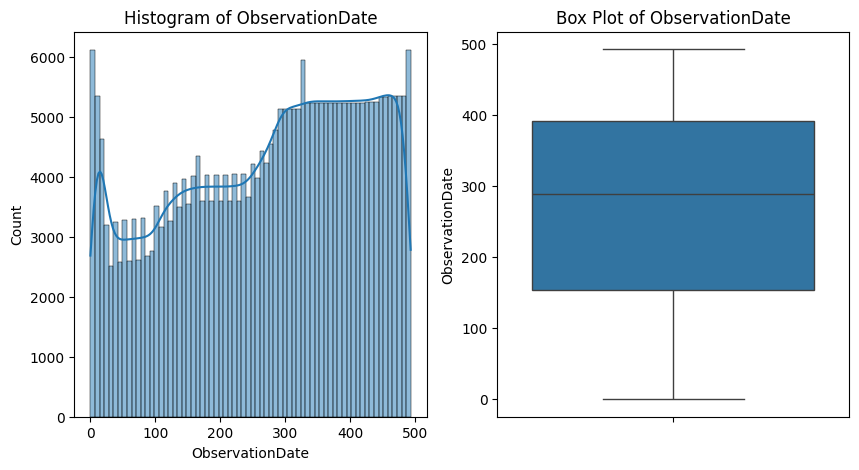

Signal-to-Noise Ratio (SNR): 4.610176167715001

----------------------------------------

Analyzing column: Province/State
Mean: 462.2782210561011
Median: 489.0
Standard Deviation: 244.079953585222
Skewness: -0.3513324857447318


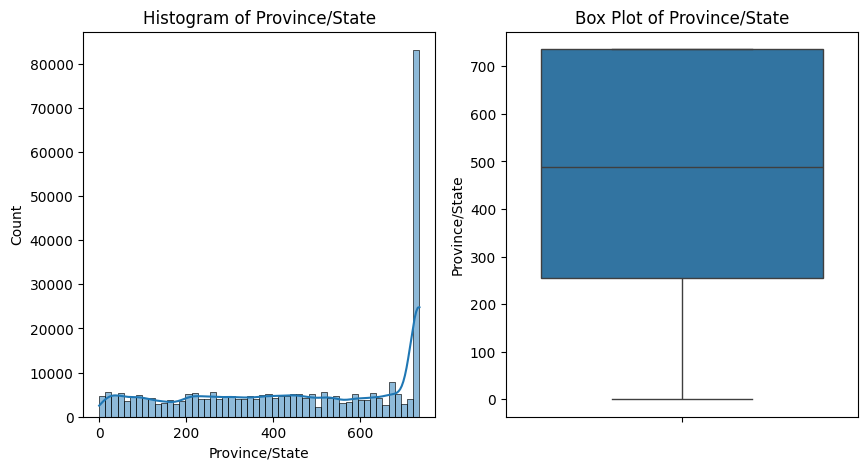

Signal-to-Noise Ratio (SNR): 4.587104756886384

----------------------------------------

Analyzing column: Country/Region
Mean: 127.72857660338937
Median: 126.0
Standard Deviation: 64.2185374855337
Skewness: -0.20972126754405584


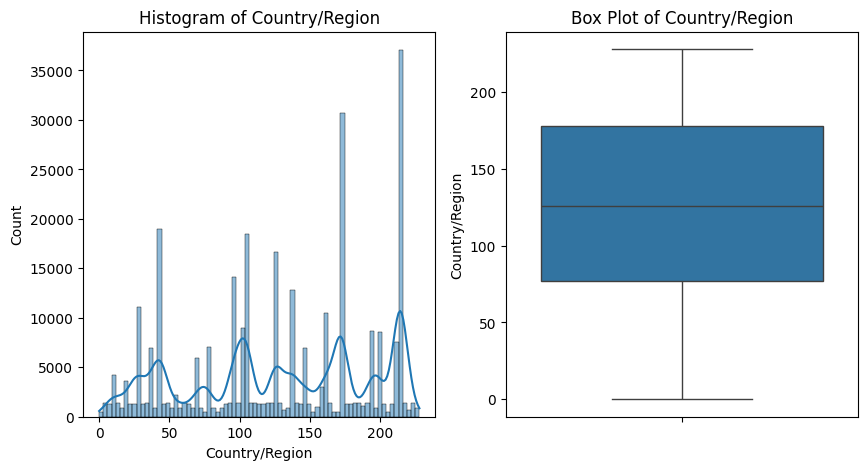

Signal-to-Noise Ratio (SNR): 4.956004170611087

----------------------------------------

Analyzing column: Last Update
Mean: 1822.897712031172
Median: 1842.0
Standard Deviation: 170.06422295532658
Skewness: -8.267352006833763


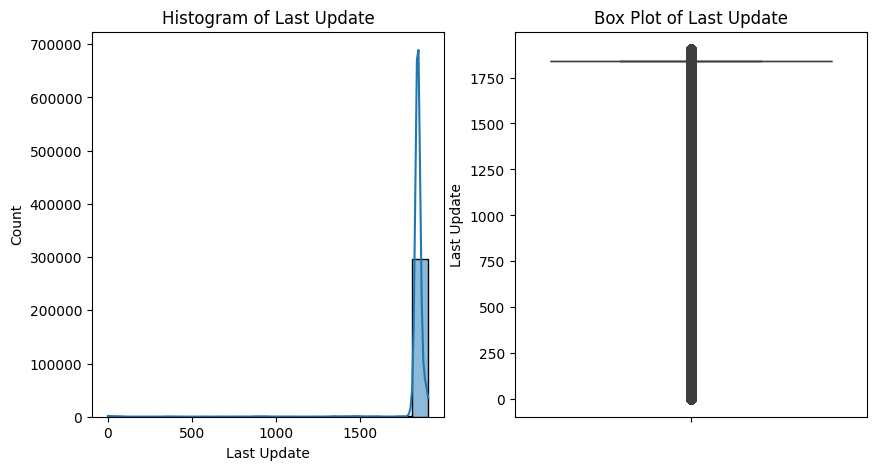

Signal-to-Noise Ratio (SNR): 115.89472733429342

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


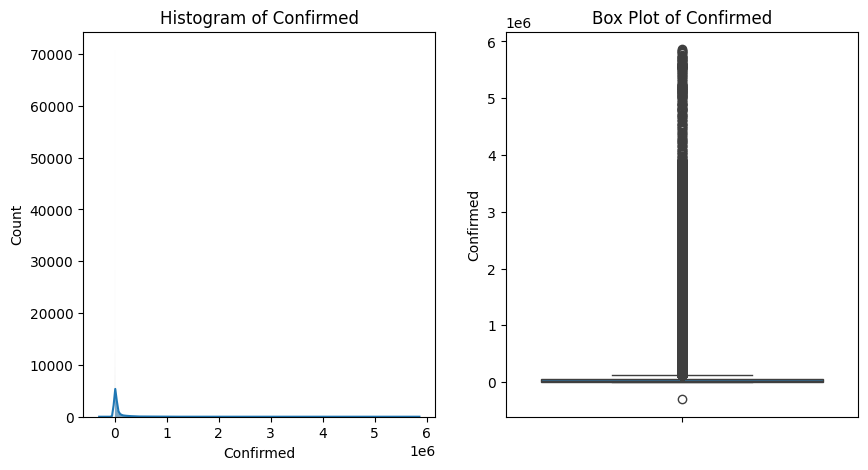

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


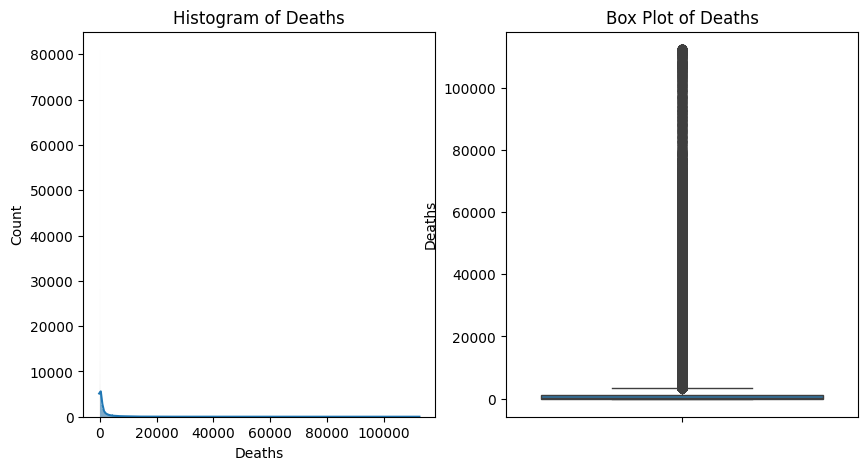

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


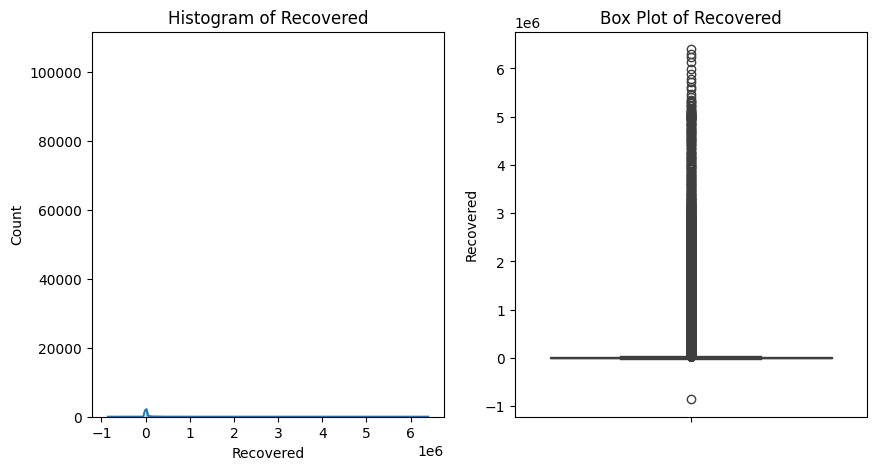

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [66]:
analyze_noise(data_copy)

<a id="ieda"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3 : Intelligently EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="i1"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.1 : Pandas Profiling</p>

⬆️ [Tabel of Contents](#contents_tabel)

<h2 style=color:green align="left"> 1) For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report </h2>

 - **Type inference:** detect the types of columns in a dataframe.

 - **Essentials:** type, unique values, missing values

 - **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range

 - **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

 - **Most frequent values**

 - **Histogram**

 - **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

 - **Missing values** matrix, count, heatmap and dendrogram of missing values

 - **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

 - **File and Image analysis** extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

<h2 style=color:green align="left"> 2) Understanding the Report </h2>

 - The report generated contains a general overview and different sections for different characteristics of attributes of the dataset. The different sections are:
 
#### A) Overview

 - Statistics on the overall dataset and the number of variables (columns) and observations (rows).

#### B) Variable Properties

 - We can scroll down to see all the variables in the dataset and their properties.
 
 - This is just a data science-type name for the columns, dimensions or fields in your dataset (table). Summary statistics and distribution plots are provided for each column in the dataset.
 
#### C) Interaction of Variables

 - Similarly, we can also view the interaction of different attributes of the dataset with each other.
 
 - A quick interactive way to explore the columns and plot them against each other as scatterplots.
 
#### D) Correlations of the variable

 - The report generated contains different types of correlations like Spearman’s, Kendall’s, etc. of all the attributes of the dataset.
 
 - A set of different correlation matrices so you can quickly see how the columns in your data correlate or impact each other. TIP: To see a brief explanation of each correlation, click "Toggle correlation descriptions".
 
#### E) Missing Values

 - Other than this the report also shows which attributes have missing values.
 
 - The report generated is really helpful in identifying patterns in the data and finding out the characteristics of the data. 
 
 - A few different visual summaries about missing values in the dataset for each column.
 
#### F) Samples

 - Data previews of the first and last 10 rows in the dataset.

<h2 style=color:green align="left"> 3) Displaying and Saving the Report </h2>

 - Once you have the data profile object, there's a few different methods you can choose from to display and save the report.

#### Display in the notebook:

      to_widgets()
      to_notebook_iframe()

#### Assign to a string:

      to_html()
      to_json()

#### Save as a file:

     to_file("report_name.html")
     to_file("report_name.json")

In [67]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

FM 2: Write some Analysis on these plots 

<a id="i2"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.2 : PandasAI</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [68]:
# Instantiate a LLM
llm = OpenAI(
    base_url="https://api.avalai.ir/v1",
    api_token="aa-rzDrWuppbQrkuqnQiUR2PuLKI96HFxT1jrpWQPrAu2isMlyW",
    temperature=0,
    seed=26
)

In [69]:
data = SmartDataframe(data, config={"llm": llm})
data.chat('Which are the 5 seekest countries?')

Traceback (most recent call last):
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpx\_transports\default.py", line 69, in map_httpcore_exceptions
    yield
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpx\_transports\default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection_pool.py", line 216, in handle_request
    raise exc from None
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\98937\AppData\Local\Programs\Python\Python312\Lib\site-packages\httpcore\_sync\connection.py", line 99, in handle_request
    raise exc
  File "c:\Users\98937\AppData\L

'Unfortunately, I was not able to answer your question, because of the following error:\n\nConnection error.\n'

In [70]:
''' %%html
<iframe src="https://www.linkedin.com/embed/feed/update/urn:li:ugcPost:7060641449888882688" height="901" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>
'''

' %%html\n<iframe src="https://www.linkedin.com/embed/feed/update/urn:li:ugcPost:7060641449888882688" height="901" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>\n'

<a id="#idp"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 4 : Initial Data Preparation On Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="log"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.1 : Logical</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [71]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
import copy
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
def modern_info(df):    
    info = pd.DataFrame({"name": df.columns,
                         "non-nulls": len(df) - df.isnull().sum().values,
                         "nulls": df.isnull().sum().values,
                         "type": df.dtypes.values,
                         "unique value of feature":df.nunique(),
                         "memory":df.memory_usage(index=False, deep=True)
                        })

    describe_stats = df.describe(include='all').T

    info["count"] = describe_stats["count"].values
    info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
    info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
    info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
    info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
    info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
    info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
    info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
    return info

In [73]:
df = pd.read_csv('covid_19_data.csv')
info_data = modern_info(df)
cm = sns.light_palette("green", as_cmap=True)
info_data.style.background_gradient(cmap=cm)

<a id="initlog"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.1.1 : Initial logic</p>

⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:cursive; color:white; font-size:300%;">Time</p>

<p style="font-family:cursive; color:white; font-size:200%;">Lambda syntax: Make Expired Function</p>
<p style="font-family:cursive; color:white; font-size:200%;">Split Syntax: Text Seperator</p>
<p style="font-family:cursive; color:white; font-size:200%;">apply Syntax: Apply Client Orders Or Data Prepration </p>
<p style="font-family:cursive; color:white; font-size:200%;">drop Syntax: Delete Rows Or Columns </p>

<p style="font-family:cursive; color:blue; font-size:200%;">ObservationDate Feature </p>

In [74]:
data_copy = copy.copy(df)
#want to extract the year, month, and day from a date string in the ObservationDate column.
data_copy['Year_ObservationData']  = data_copy.apply(
    lambda x: int(x['ObservationDate'].split('/')[-1]), axis=1)
#This line extracts the year from the ObservationDate by splitting the string on the '/' character and taking the last element, which is assumed to be the year.
data_copy['Day_ObservationData'] = data_copy.apply(
    lambda x: int(x['ObservationDate'].split('/')[-2]), axis=1)
data_copy['Month_ObservationData']   = data_copy.apply(
    lambda x: int(x['ObservationDate'].split('/')[-3]), axis=1)

''' note: can use the pd.to_datetime function to convert the ObservationDate to a datetime object and then extract the year, month, and day directly.'''

In [75]:
data_copy.drop(columns=['ObservationDate'], inplace=True)

In [76]:
info_data = modern_info(data_copy)
info_data.style.background_gradient(cmap=cm)

**FM 3: Search about lambda and map functions and use these for sample code.**

<p style="font-family:cursive; color:blue; font-size:200%;">Last Updata Feature </p>

In [77]:
data_copy_1 = copy.copy(data_copy)

In [78]:
#calculates the number of characters in each element of the 'Last Update' column
'''
list(set(char_num)) converts the char_num list into a set using the set() function, 
which removes any duplicate values. 
The resulting set is then converted back into a list using the list() function.
'''
char_num = []
for i in list(data_copy_1['Last Update']):
    char_num.append(len(i))

list(set(char_num))

[11, 13, 14, 15, 19]

In [79]:
samples = {'v1':[], 'v2':[], 'v3':[], 'v4':[], 'v5':[]}
for i in list(data_copy_1['Last Update']):
    if len(i) == 11:
        samples['v1'].append(i)        
    elif len(i) == 13:
        samples['v2'].append(i)
    elif len(i) == 14:
        samples['v3'].append(i)
    elif len(i) == 15:
        samples['v4'].append(i)
    elif len(i) == 19:
        samples['v5'].append(i)

In [80]:
samples['v1'][0]

'3/8/20 5:31'

In [81]:
samples['v2'][0]

'1/23/20 17:00'

In [82]:
samples['v3'][0]

'2/1/2020 11:53'

In [83]:
samples['v4'][0]

'1/22/2020 17:00'

In [84]:
samples['v5'][0]

'2020-02-02T23:43:02'

In [85]:
for i in samples['v5']:
    if not 'T' in i:
        print(i)
        break

2020-03-23 23:23:20


In [86]:
#Day of update
data_copy_1['Year_LastUpdate']  = data_copy_1.apply(
    lambda x: int(x['Last Update'].split(' ')[-2].split('/')[-1]) if len(x['Last Update'])<19 else int(x['Last Update'][:4]), axis=1)
data_copy_1['Day_LastUpdate'] = data_copy_1.apply(
    lambda x: int(x['Last Update'].split(' ')[-2].split('/')[-2]) if len(x['Last Update'])<19 else int(x['Last Update'][8:10]), axis=1)
data_copy_1['Month_LastUpdate']   = data_copy_1.apply(
    lambda x: int(x['Last Update'].split(' ')[-2].split('/')[-3]) if len(x['Last Update'])<19 else int(x['Last Update'][5:7]), axis=1)

#Time of update
data_copy_1['Hour_LastUpdate']   = data_copy_1.apply(
    lambda x: int(x['Last Update'].split(' ')[-1].split(':')[-2]) if len(x['Last Update'])<19 else int(x['Last Update'][11:13]), axis=1)
data_copy_1['Min_LastUpdate']   = data_copy_1.apply(
    lambda x: int(x['Last Update'].split(' ')[-1].split(':')[-1]) if len(x['Last Update'])<19 else int(x['Last Update'][14:16]), axis=1)
data_copy_1['Sec_LastUpdate']   = data_copy_1.apply(
    lambda x: 0 if len(x['Last Update'])<19 else int(x['Last Update'][-2:]), axis=1)

In [87]:
data_copy_1.drop(columns=['Last Update'], inplace=True)

In [88]:
info_data = modern_info(data_copy_1)
info_data.style.background_gradient(cmap=cm)

In [89]:
data_copy_1['Year_LastUpdate'].unique()

array([2020,   20, 2021], dtype=int64)

In [90]:
data_copy_2 = copy.copy(data_copy_1)

In [91]:
data_copy_2['Year_LastUpdate']  = data_copy_2.apply(
    lambda x: x['Year_LastUpdate'] if len(str(x['Year_LastUpdate']))==4 else int('20' + str(x['Year_LastUpdate'])), axis=1)

In [92]:
data_copy_2['Year_LastUpdate'].unique()

array([2020, 2021], dtype=int64)

In [93]:
info_data = modern_info(data_copy_2)
info_data.style.background_gradient(cmap=cm)

In [94]:
#utilizes the LabelEncoder from the sklearn.preprocessing module to convert categorical string data into numerical format.

data_new = copy.copy(data_copy_2)
le = LabelEncoder()
#This line iterates over all columns in the DataFrame data_new that have a data type of object
''' 
This line applies the fit_transform method of the LabelEncoder to the current column. 
The fit_transform method does two things:
*Fit: It learns the unique values in the column and assigns them an integer value.
*Transform: It replaces the original categorical values with their corresponding integer values. 
'''
for column in data_new.loc[:, data_new.dtypes == object]:
    print(column)
    data_new[column] = le.fit_transform(data_new[column])


Province/State
Country/Region


In [95]:
info_data = modern_info(data_copy_2)
info_data.style.background_gradient(cmap=cm)

<Axes: >

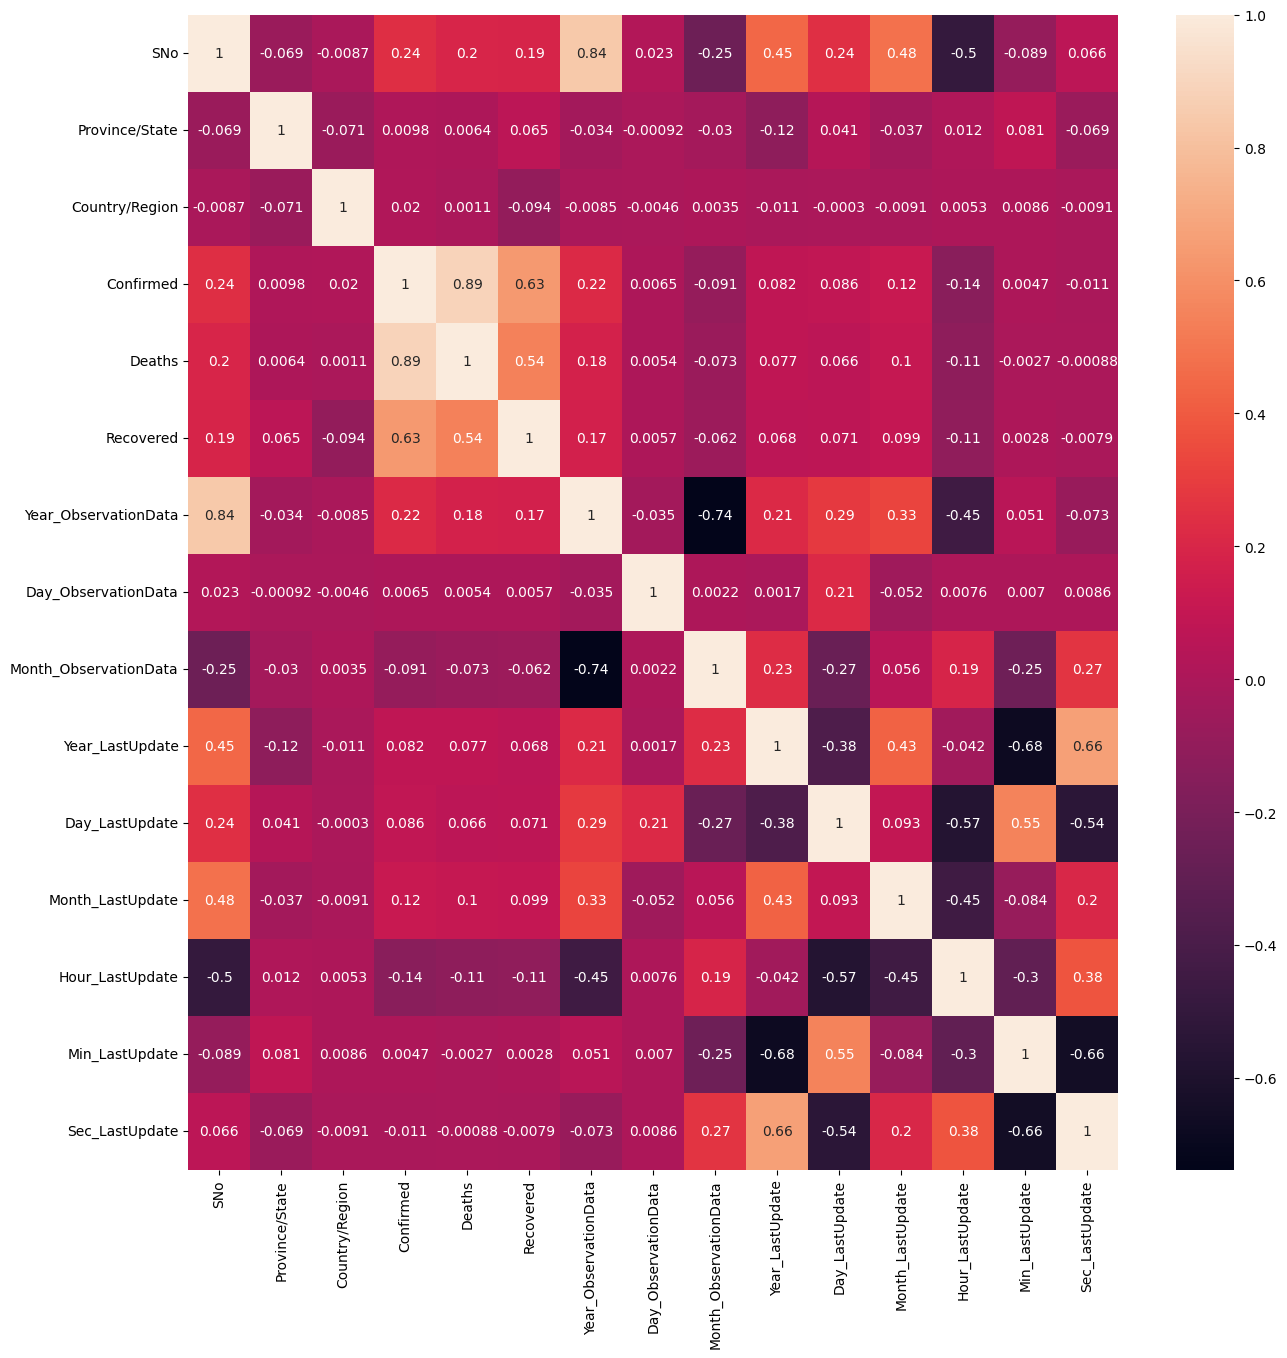

In [96]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_new.corr(), annot=True)

In [97]:
data_copy_2.drop(columns=['SNo'], inplace=True)

<a id="comlog"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.1.2 : Common logic</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [98]:
data_copy_3 = copy.copy(data_copy_2)

In [99]:
#to convert all the values in the 'Province/State' & 'Country/Region' column of 'data_copy_3' to lowercase
data_copy_3['Province/State'] = data_copy_3['Province/State'].str.lower()
data_copy_3['Country/Region'] = data_copy_3['Country/Region'].str.lower()

In [100]:
data_copy_3['Province/State'].unique()

array(['anhui', 'beijing', 'chongqing', 'fujian', 'gansu', 'guangdong',
       'guangxi', 'guizhou', 'hainan', 'hebei', 'heilongjiang', 'henan',
       'hong kong', 'hubei', 'hunan', 'inner mongolia', 'jiangsu',
       'jiangxi', 'jilin', 'liaoning', 'macau', 'ningxia', 'qinghai',
       'shaanxi', 'shandong', 'shanghai', 'shanxi', 'sichuan', 'taiwan',
       'tianjin', 'tibet', 'washington', 'xinjiang', 'yunnan', 'zhejiang',
       nan, 'unknown', 'chicago', 'illinois', 'california', 'arizona',
       'ontario', 'new south wales', 'victoria', 'british columbia',
       'bavaria', 'queensland', 'chicago, il', 'south australia',
       'boston, ma', 'los angeles, ca', 'orange, ca', 'santa clara, ca',
       'seattle, wa', 'tempe, az', 'san benito, ca', 'toronto, on',
       'london, on', 'madison, wi', 'cruise ship',
       'diamond princess cruise ship', 'san diego county, ca',
       'san antonio, tx', 'ashland, ne', 'travis, ca',
       'from diamond princess', 'lackland, tx', 'humbo

In [101]:
#to fill any missing values (NaNs) with the string 'unknown'.
data_copy_3['Province/State'].fillna('unknown', inplace=True)
data_copy_3['Country/Region'].fillna('unknown', inplace=True)

In [102]:
info_data = modern_info(data_copy_3)
info_data.style.background_gradient(cmap=cm)

In [103]:
data_copy_4 = copy.copy(data_copy_3)

In [104]:
data_copy_4['Province/State'].unique()

array(['anhui', 'beijing', 'chongqing', 'fujian', 'gansu', 'guangdong',
       'guangxi', 'guizhou', 'hainan', 'hebei', 'heilongjiang', 'henan',
       'hong kong', 'hubei', 'hunan', 'inner mongolia', 'jiangsu',
       'jiangxi', 'jilin', 'liaoning', 'macau', 'ningxia', 'qinghai',
       'shaanxi', 'shandong', 'shanghai', 'shanxi', 'sichuan', 'taiwan',
       'tianjin', 'tibet', 'washington', 'xinjiang', 'yunnan', 'zhejiang',
       'unknown', 'chicago', 'illinois', 'california', 'arizona',
       'ontario', 'new south wales', 'victoria', 'british columbia',
       'bavaria', 'queensland', 'chicago, il', 'south australia',
       'boston, ma', 'los angeles, ca', 'orange, ca', 'santa clara, ca',
       'seattle, wa', 'tempe, az', 'san benito, ca', 'toronto, on',
       'london, on', 'madison, wi', 'cruise ship',
       'diamond princess cruise ship', 'san diego county, ca',
       'san antonio, tx', 'ashland, ne', 'travis, ca',
       'from diamond princess', 'lackland, tx', 'humboldt c

In [105]:
# to preprocess a DataFrame column containing city and state information.
def preprocess_city_state(df, column_name):
    # Split the column into city and state
    # n=1 limits the split to occur only once
    # expand=True ensures the result is expanded into separate columns
    df[['City', 'State']] = df[column_name].str.split(',', n=1, expand=True)
    
    # Clean up the columns
    # to remove leading and trailing whitespace from the 'City' column
    df['City'] = df['City'].str.strip()
    df['State'] = df['State'].str.strip().str.upper()
    
    return df

In [106]:
# Apply the comprehensive preprocessing function
data_copy_4 = preprocess_city_state(data_copy_4, 'Province/State')

In [107]:
# Display unique values in the new columns
print("\nUnique values in 'City':")
print(data_copy_4['City'].unique())

print("\nUnique values in 'State':")
print(data_copy_4['State'].unique())


Unique values in 'City':
['anhui' 'beijing' 'chongqing' 'fujian' 'gansu' 'guangdong' 'guangxi'
 'guizhou' 'hainan' 'hebei' 'heilongjiang' 'henan' 'hong kong' 'hubei'
 'hunan' 'inner mongolia' 'jiangsu' 'jiangxi' 'jilin' 'liaoning' 'macau'
 'ningxia' 'qinghai' 'shaanxi' 'shandong' 'shanghai' 'shanxi' 'sichuan'
 'taiwan' 'tianjin' 'tibet' 'washington' 'xinjiang' 'yunnan' 'zhejiang'
 'unknown' 'chicago' 'illinois' 'california' 'arizona' 'ontario'
 'new south wales' 'victoria' 'british columbia' 'bavaria' 'queensland'
 'south australia' 'boston' 'los angeles' 'orange' 'santa clara' 'seattle'
 'tempe' 'san benito' 'toronto' 'london' 'madison' 'cruise ship'
 'diamond princess cruise ship' 'san diego county' 'san antonio' 'ashland'
 'travis' 'from diamond princess' 'lackland' 'humboldt county'
 'sacramento county' 'omaha' 'unassigned location (from diamond princess)'
 'montreal' 'western australia' 'portland' 'snohomish county' 'providence'
 'king county' 'cook county' 'tasmania' 'grafton co

In [108]:
info_data = modern_info(data_copy_4)
info_data.style.background_gradient(cmap=cm)

In [109]:
#to fill any missing values (NaN) in the 'State' column of a DataFrame named data_copy_4 with the string 'Not In US'. 
data_copy_4['State'].fillna('Not In US', inplace=True)

In [110]:
info_data = modern_info(data_copy_4)
info_data.style.background_gradient(cmap=cm)

In [111]:
data_copy_4.drop(columns=['Province/State'], inplace=True)

In [112]:
data_copy_5 = copy.copy(data_copy_4)

In [113]:
data_copy_5['Country/Region'].unique()

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'china', 'kiribati', 'singapore',
       'philippines', 'malaysia', 'vietnam', 'australia', 'mexico',
       'brazil', 'colombia', 'france', 'nepal', 'canada', 'cambodia',
       'sri lanka', 'ivory coast', 'germany', 'finland',
       'united arab emirates', 'india', 'italy', 'uk', 'russia', 'sweden',
       'spain', 'belgium', 'others', 'egypt', 'iran', 'israel', 'lebanon',
       'iraq', 'oman', 'afghanistan', 'bahrain', 'kuwait', 'austria',
       'algeria', 'croatia', 'switzerland', 'pakistan', 'georgia',
       'greece', 'north macedonia', 'norway', 'romania', 'denmark',
       'estonia', 'netherlands', 'san marino', ' azerbaijan', 'belarus',
       'iceland', 'lithuania', 'new zealand', 'nigeria', 'north ireland',
       'ireland', 'luxembourg', 'monaco', 'qatar', 'ecuador',
       'azerbaijan', 'czech republic', 'armenia', 'dominican republic',
       'indonesia', 'portugal

In [114]:
import pandas as pd

def preprocess_country_region(df, column_name):
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()
    
    # Convert to lowercase and strip whitespace
    df[column_name] = df[column_name].str.lower().str.strip()
    
    # Dictionary for country name standardization
    country_map = {
        'mainland china': 'China',
        'hong kong': 'Hong Kong',
        'macau': 'Macau',
        'us': 'United States',
        'uk': 'United Kingdom',
        'united arab emirates': 'UAE',
        'north macedonia': 'North Macedonia',
        'north ireland': 'United Kingdom',
        'ireland': 'Ireland',
        'republic of ireland': 'Ireland',
        'czech republic': 'Czechia',
        'saint barthelemy': 'Saint Barthélemy',
        'st. martin': 'Saint Martin',
        "('st. martin',)": 'Saint Martin',
        'vatican city': 'Vatican City',
        'holy see': 'Vatican City',
        'congo (kinshasa)': 'Democratic Republic of the Congo',
        'congo (brazzaville)': 'Republic of the Congo',
        'republic of the congo': 'Republic of the Congo',
        'gambia, the': 'Gambia',
        'bahamas, the': 'Bahamas',
        'the bahamas': 'Bahamas',
        'the gambia': 'Gambia',
        'cape verde': 'Cabo Verde',
        'east timor': 'Timor-Leste',
        'timor-leste': 'Timor-Leste',
        'diamond princess': 'Diamond Princess Cruise Ship',
        'ms zaandam': 'MS Zaandam Cruise Ship',
        'burma': 'Myanmar',
        'occupied palestinian territory': 'Palestine',
        'west bank and gaza': 'Palestine',
        'sao tome and principe': 'São Tomé and Príncipe',
        'ivory coast': 'Côte d\'Ivoire',
        'channel islands': 'Channel Islands',
        'others': 'Other'
    }
    
    # Apply the mapping
    df[column_name] = df[column_name].replace(country_map)
    
    # Capitalize each word
    df[column_name] = df[column_name].str.title()
    
    # Create a new column for grouping
    df['Country_Group'] = df[column_name]
    
    # Group special categories
    cruise_ships = ['Diamond Princess Cruise Ship', 'MS Zaandam Cruise Ship']
    df.loc[df['Country_Group'].isin(cruise_ships), 'Country_Group'] = 'Cruise Ships'
    
    special_regions = ['Hong Kong', 'Macau', 'Taiwan']
    df.loc[df['Country_Group'].isin(special_regions), 'Country_Group'] = 'China (Special Regions)'
    
    return df

In [115]:
data_copy_5 = preprocess_country_region(data_copy_5, 'Country/Region')

print(data_copy_5['Country_Group'].unique())

['China' 'China (Special Regions)' 'United States' 'Japan' 'Thailand'
 'South Korea' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam'
 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' "Côte D'Ivoire" 'Germany' 'Finland' 'Uae' 'India'
 'Italy' 'United Kingdom' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Other'
 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain'
 'Kuwait' 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia'
 'Netherlands' 'San Marino' 'Azerbaijan' 'Belarus' 'Iceland' 'Lithuania'
 'New Zealand' 'Nigeria' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador'
 'Czechia' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra'
 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan'
 'Ukraine' 'Saint Barthélemy' 'Hungary' 'Faroe Islands' 'Gibraltar'
 'Liechtenstein' 'Poland' 'Tunisia' 'Palestine' 'Bosnia And Herze

In [116]:
data_copy_5.drop(columns=['Country/Region'], inplace=True)

In [117]:
info_data = modern_info(data_copy_5)
info_data.style.background_gradient(cmap=cm)

In [118]:
data_new = copy.copy(data_copy_5)
le = LabelEncoder()
for column in data_new.loc[:, data_new.dtypes == object]:
    print(column)
    data_new[column] = le.fit_transform(data_new[column])

City
State
Country_Group


<Axes: >

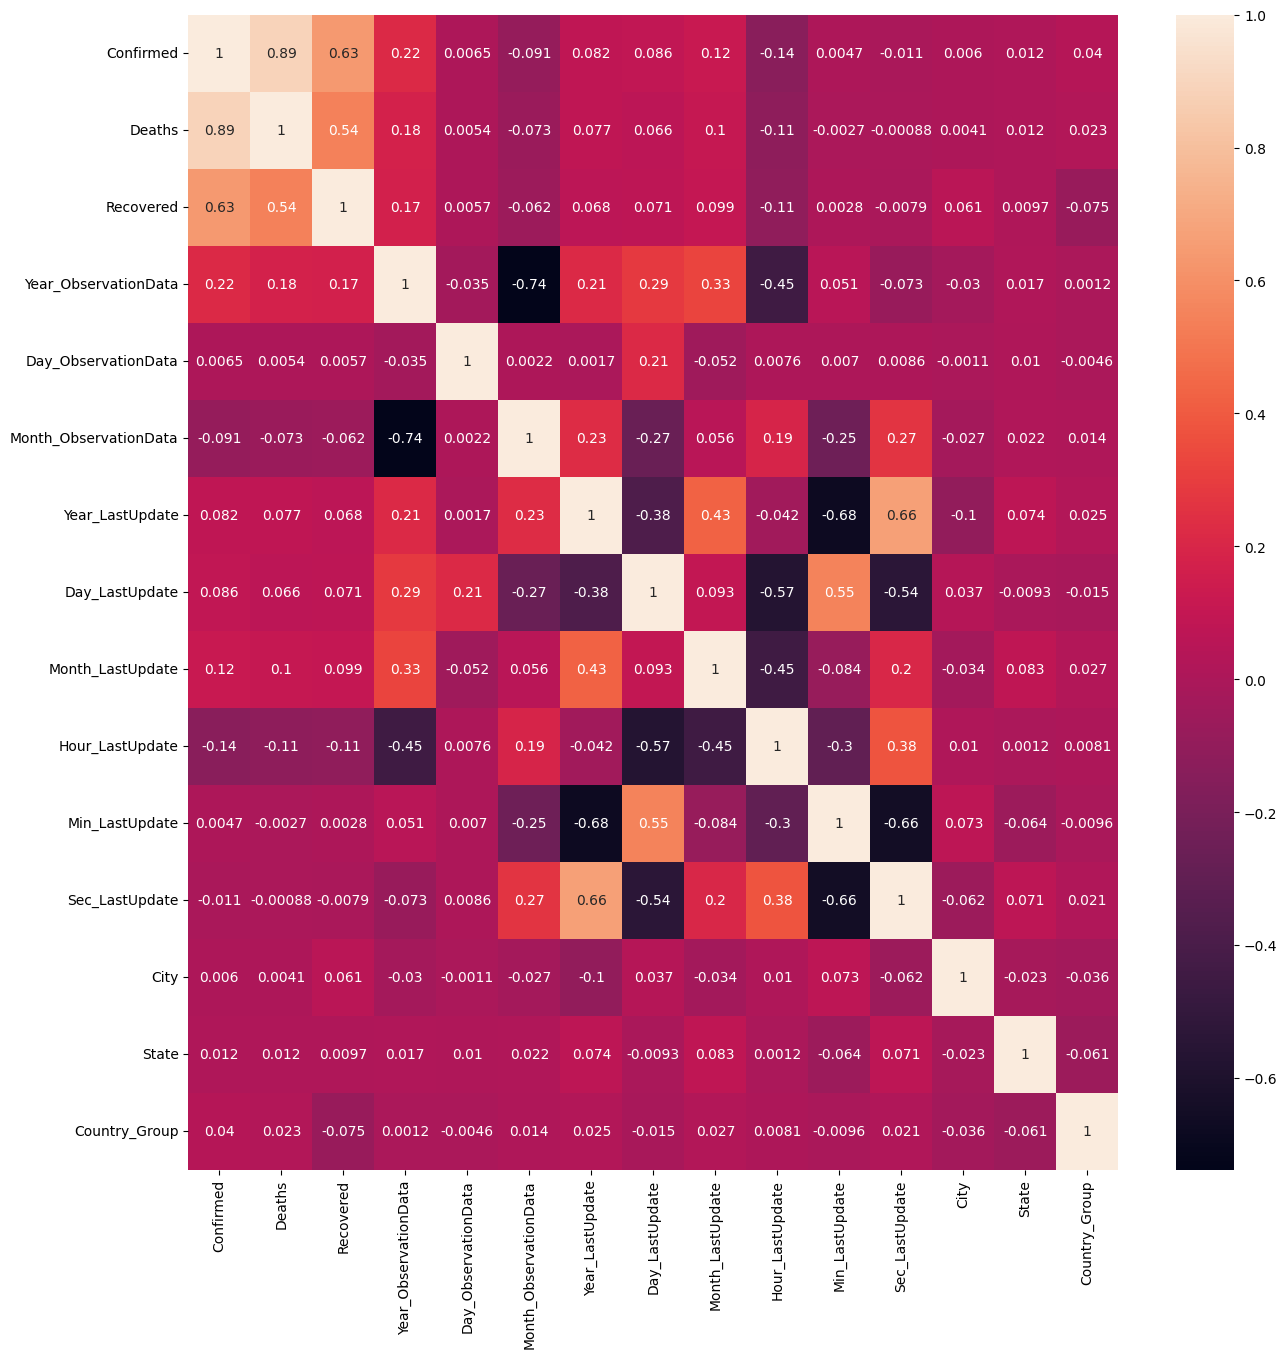

In [119]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_new.corr(), annot=True)

<a id="scilog"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.1.3 : Scientific logic</p>

⬆️ [Tabel of Contents](#contents_tabel)

**You must search about specific science or interact with client and use functions for improve( academic acceptance ) your data**

<a id="type"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.2 : Type</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="ds"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.2.1 : Data Storage</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [120]:
data_copy_5.memory_usage(index=False, deep=True).sum()

82495560

In [121]:
info_data = modern_info(data_copy_5)
info_data.style.background_gradient(cmap=cm)

In [122]:
data_copy_5

Confirmed  Deaths  Recovered  Year_ObservationData  \
0             1.0     0.0        0.0                  2020   
1            14.0     0.0        0.0                  2020   
2             6.0     0.0        0.0                  2020   
3             1.0     0.0        0.0                  2020   
4             0.0     0.0        0.0                  2020   
...           ...     ...        ...                   ...   
306424   102641.0  2335.0    95289.0                  2021   
306425    29147.0   245.0        0.0                  2021   
306426     1364.0     1.0     1324.0                  2021   
306427    87550.0  1738.0    83790.0                  2021   
306428   391559.0  4252.0        0.0                  2021   

        Day_ObservationData  Month_ObservationData  Year_LastUpdate  \
0                        22                      1             2020   
1                        22                      1             2020   
2                        22                      1             2020   
3                        22                      1             2020   
4                        22                      1             2020   
...                     ...                    ...              ...   
306424                   29                      5             2021   
306425                   29                      5             2021   
306426                   29                      5             2021   
306427                   29                      5             2021   
306428                   29                      5             2021   

        Day_LastUpdate  Month_LastUpdate  Hour_LastUpdate  Min_LastUpdate  \
0                   22                 1               17               0   
1                   22                 1               17               0   
2                   22                 1               17               0   
3                   22                 1               17               0   
4                   22                 1               17               0   
...                ...               ...              ...             ...   
306424              30                 5                4              20   
306425              30                 5                4              20   
306426              30                 5                4              20   
306427              30                 5                4              20   
306428              30                 5                4              20   

        Sec_LastUpdate               City      State Country_Group  
0                    0              anhui  Not In US         China  
1                    0            beijing  Not In US         China  
2                    0          chongqing  Not In US         China  
3                    0             fujian  Not In US         China  
4                    0              gansu  Not In US         China  
...                ...                ...        ...           ...  
306424              55  zaporizhia oblast  Not In US       Ukraine  
306425              55            zeeland  Not In US   Netherlands  
306426              55           zhejiang  Not In US         China  
306427              55    zhytomyr oblast  Not In US       Ukraine  
306428              55       zuid-holland  Not In US   Netherlands  

[306429 rows x 15 columns]

<a id="dtm"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.2.2 : Data Type Management</p>

⬆️ [Tabel of Contents](#contents_tabel)

          
            if unique_values == 2:
                suggestions[column] = ('boolean', 'Current: ' + str(current_type))
            elif df[column].min() >= 0 and df[column].max() < 255:
                suggestions[column] = ('uint8', 'Current: ' + str(current_type))
            elif df[column].min() >= -128 and df[column].max() < 127:
                suggestions[column] = ('int8', 'Current: ' + str(current_type))
            elif df[column].min() >= 0 and df[column].max() < 65535:
                suggestions[column] = ('uint16', 'Current: ' + str(current_type))
            elif df[column].min() >= -32768 and df[column].max() < 32767:
                suggestions[column] = ('int16', 'Current: ' + str(current_type))
            elif df[column].min() >= 0 and df[column].max() < 4294967295:
                suggestions[column] = ('uint32', 'Current: ' + str(current_type))
            elif current_type == 'float64' and df[column].apply(lambda x: x.is_integer()).all():
                suggestions[column] = ('int64', 'Current: float64 (all integers)')             

In [123]:
data_copy_5['Day_ObservationData'] = data_copy_5['Day_ObservationData'].astype('uint8')
data_copy_5['Day_LastUpdate'] = data_copy_5['Day_LastUpdate'].astype('uint8')
data_copy_5['Month_LastUpdate'] = data_copy_5['Month_LastUpdate'].astype('uint8')
data_copy_5['Month_ObservationData'] = data_copy_5['Month_ObservationData'].astype('uint8')
data_copy_5['Hour_LastUpdate'] = data_copy_5['Hour_LastUpdate'].astype('uint8')
data_copy_5['Min_LastUpdate'] = data_copy_5['Min_LastUpdate'].astype('uint8')
data_copy_5['Sec_LastUpdate'] = data_copy_5['Sec_LastUpdate'].astype('uint8')

In [124]:
data_copy_5.memory_usage(index=False, deep=True).sum()

67480539

<a id="deo"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.2.3 : Data Encoding(Optional)</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [125]:
le = LabelEncoder()
data_copy_5['Year_ObservationData'] = le.fit_transform(data_copy_5['Year_ObservationData'])
data_copy_5['Year_LastUpdate']      = le.transform(data_copy_5['Year_LastUpdate'])

In [126]:
le.classes_

array([2020, 2021], dtype=int64)

In [127]:
le.transform([2020])

array([1], dtype=int64)

In [128]:
le.transform([2021])

ValueError: y contains previously unseen labels: [2022]

In [ ]:
le.inverse_transform([0])

array([2020])

In [ ]:
info_data = modern_info(data_copy_5)
info_data.style.background_gradient(cmap=cm)

In [ ]:
data_copy_6 = copy.copy(data_copy_5)

In [ ]:
data_copy_6['Year_LastUpdate']      = data_copy_6['Year_LastUpdate'].astype('boolean')
data_copy_6['Year_ObservationData'] = data_copy_6['Year_ObservationData'].astype('boolean')

In [ ]:
data_copy_6.memory_usage(index=False, deep=True).sum()

71164663

In [ ]:
info_data = modern_info(data_copy_6)
info_data.style.background_gradient(cmap=cm)